In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
housing_pd = pd.read_csv("/content/Capstone/housing .csv")

In [3]:
housing_pd

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
housing_pd['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
housing_pd_shuffled = housing_pd.sample(n=len(housing_pd), random_state=1)
housing_pd_shuffled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,<1H OCEAN
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,INLAND
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,NEAR BAY
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,NEAR BAY
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,<1H OCEAN
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,<1H OCEAN
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,<1H OCEAN
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,INLAND


In [6]:
pd.get_dummies(housing_pd_shuffled['ocean_proximity']).head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,1,0,0,0,0
2151,0,1,0,0,0
15927,0,0,0,1,0
82,0,0,0,1,0
8161,1,0,0,0,0


In [7]:
housing_pd_shuffled.drop('ocean_proximity' , axis=1).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0


In [8]:
housing_pd_final = pd.concat([housing_pd_shuffled.drop('ocean_proximity' , axis=1),
                             pd.get_dummies(housing_pd_shuffled['ocean_proximity'])], axis=1)
housing_pd_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,1,0,0,0,0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,0,1,0,0,0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,0,0,0,1,0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,0,0,0,1,0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,1,0,0,0,0
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,1,0,0,0,0
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,1,0,0,0,0
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,0,1,0,0,0


In [9]:
housing_pd_final = housing_pd_final[['longitude','latitude','housing_median_age',
                                     'total_rooms','total_bedrooms','population'
                                     ,'households','median_income'
                                     ,'<1H OCEAN','INLAND','ISLAND','NEAR BAY','NEAR OCEAN',
                                     'median_house_value']]
housing_pd_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,1,0,0,0,0,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,0,1,0,0,0,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,0,0,0,1,0,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,0,0,0,1,0,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,1,0,0,0,0,225400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,1,0,0,0,0,205300.0
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,1,0,0,0,0,500001.0
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,1,0,0,0,0,104800.0
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,0,1,0,0,0,140700.0


In [10]:
housing_pd_final = housing_pd_final.dropna()
len(housing_pd_final)

20433

In [11]:
train_pd, test_pd, val_pd = housing_pd_final[:18000], housing_pd_final[18000:19217],housing_pd_final[19215:]
len(train_pd), len(test_pd), len(val_pd)

(18000, 1217, 1218)

In [12]:
x_train, y_train = train_pd.to_numpy()[:, :-1], train_pd.to_numpy()[:, -1]
x_val, y_val = val_pd.to_numpy()[:, :-1], val_pd.to_numpy()[:, -1]
x_test, y_test = test_pd.to_numpy()[:, :-1], test_pd.to_numpy()[:, -1]

In [13]:
(x_train.shape, y_train.shape) , (x_val.shape, y_val.shape), (x_test.shape, y_test.shape)

(((18000, 13), (18000,)), ((1218, 13), (1218,)), ((1217, 13), (1217,)))

In [14]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler().fit(x_train[:, :8])

def preprocessor(x):
    A = np.copy(x)
    A[:, :8] = scaler.transform(A[:, :8])
    return A

x_train, x_val, x_test = preprocessor(x_train), preprocessor(x_val), preprocessor(x_test)

In [15]:
x_train.shape, x_val.shape, x_test.shape

((18000, 13), (1218, 13), (1217, 13))

In [16]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression

lm = LinearRegression().fit(x_train, y_train)
mse(lm.predict(x_train), y_train, squared=False),mse(lm.predict(x_val), y_val, squared=False)


(68593.05578127236, 71382.43558330165)

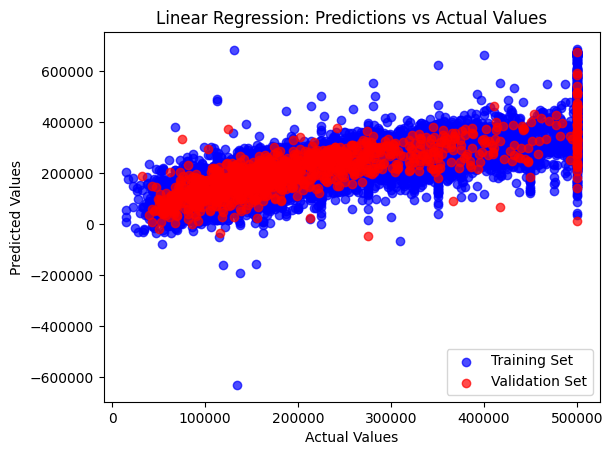

In [28]:
import matplotlib.pyplot as plt

# Predictions on Training Set
train_predictions = lm.predict(x_train)

# Predictions on Validation Set
val_predictions = lm.predict(x_val)

# Scatter plot for both Training and Validation Sets
plt.scatter(y_train, train_predictions, color='blue', label='Training Set', alpha=0.7)
plt.scatter(y_val, val_predictions, color='red', label='Validation Set', alpha=0.7)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Predictions vs Actual Values')
plt.legend()
plt.show()


In [17]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=10).fit(x_train, y_train)
mse(knn.predict(x_train), y_train, squared=False),mse(knn.predict(x_val), y_val, squared=False)


(53759.09908812057, 62161.22860469906)

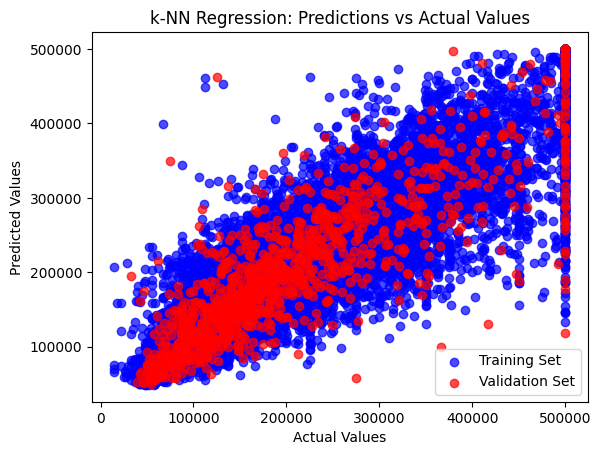

In [27]:
import matplotlib.pyplot as plt

# Predictions on Training Set
knn_train_predictions = knn.predict(x_train)

# Predictions on Validation Set
knn_val_predictions = knn.predict(x_val)

# Scatter plot for both Training and Validation Sets
plt.scatter(y_train, knn_train_predictions, color='blue', label='Training Set', alpha=0.7)
plt.scatter(y_val, knn_val_predictions, color='red', label='Validation Set', alpha=0.7)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('k-NN Regression: Predictions vs Actual Values')
plt.legend()
plt.show()


In [18]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth=10).fit(x_train, y_train)
mse(rfr.predict(x_train), y_train, squared=False),mse(rfr.predict(x_val), y_val, squared=False)


(43402.886691492175, 53340.52574306049)

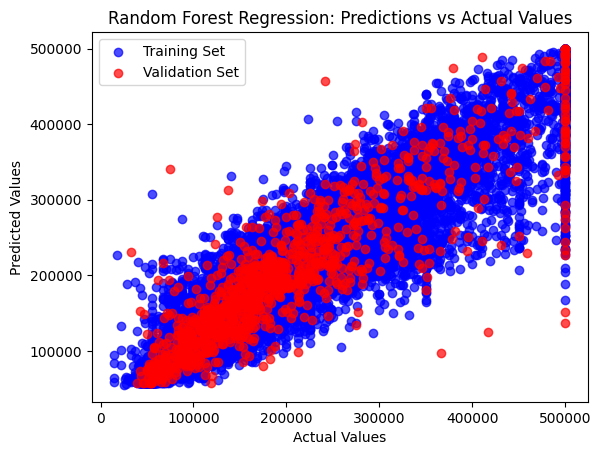

In [29]:
import matplotlib.pyplot as plt

# Predictions on Training Set
rfr_train_predictions = rfr.predict(x_train)

# Predictions on Validation Set
rfr_val_predictions = rfr.predict(x_val)

# Scatter plot for both Training and Validation Sets
plt.scatter(y_train, rfr_train_predictions, color='blue', label='Training Set', alpha=0.7)
plt.scatter(y_val, rfr_val_predictions, color='red', label='Validation Set', alpha=0.7)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regression: Predictions vs Actual Values')
plt.legend()
plt.show()


In [19]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=250).fit(x_train, y_train)
mse(gbr.predict(x_train), y_train, squared=False),mse(gbr.predict(x_val), y_val, squared=False)


(47274.82259072158, 51377.967594814436)

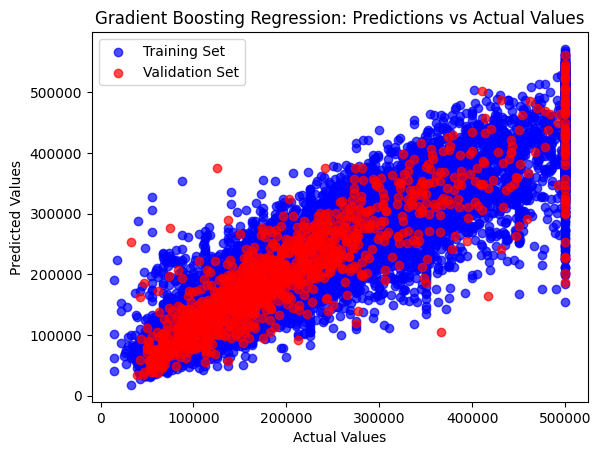

In [30]:
import matplotlib.pyplot as plt

# Predictions on Training Set
gbr_train_predictions = gbr.predict(x_train)

# Predictions on Validation Set
gbr_val_predictions = gbr.predict(x_val)

# Scatter plot for both Training and Validation Sets
plt.scatter(y_train, gbr_train_predictions, color='blue', label='Training Set', alpha=0.7)
plt.scatter(y_val, gbr_val_predictions, color='red', label='Validation Set', alpha=0.7)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Gradient Boosting Regression: Predictions vs Actual Values')
plt.legend()
plt.show()


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

simple_nn = Sequential()
simple_nn.add(InputLayer((13,)))
simple_nn.add(Dense(2, 'relu'))
simple_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('models/simple_nn', save_best_only=True)
simple_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
simple_nn.fit(x=x_train, y=y_train, validation_data=(x_val, y_val), callbacks=[cp], epochs=100)

Epoch 1/100
563/563 [==============================] - 3s 3ms/step - loss: 50662481920.0000 - root_mean_squared_error: 225083.2812 - val_loss: 41259892736.0000 - val_root_mean_squared_error: 203125.3125
Epoch 2/100
563/563 [==============================] - 2s 4ms/step - loss: 31047538688.0000 - root_mean_squared_error: 176203.1250 - val_loss: 23833176064.0000 - val_root_mean_squared_error: 154379.9688
Epoch 3/100
563/563 [==============================] - 2s 3ms/step - loss: 19037530112.0000 - root_mean_squared_error: 137976.5625 - val_loss: 13785145344.0000 - val_root_mean_squared_error: 117410.1562
Epoch 4/100
563/563 [==============================] - 1s 3ms/step - loss: 8949994496.0000 - root_mean_squared_error: 94604.4141 - val_loss: 5612112384.0000 - val_root_mean_squared_error: 74914.0312
Epoch 5/100
563/563 [==============================] - 1s 3ms/step - loss: 5173681664.0000 - root_mean_squared_error: 71928.3125 - val_loss: 5223085568.0000 - val_root_mean_squared_error: 7227

In [21]:
from tensorflow.keras.models import load_model

simple_nn = load_model('models/simple_nn')
mse(simple_nn.predict(x_train), y_train, squared=False),mse(simple_nn.predict(x_val), y_val, squared=False)

39/39 [==============================] - 0s 2ms/step


(65897.38629467148, 68472.94685868222)

39/39 [==============================] - 0s 2ms/step


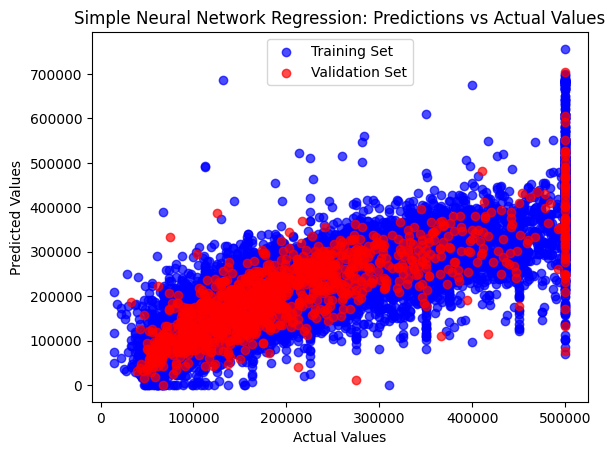

In [32]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

# Load the saved model
simple_nn = load_model('models/simple_nn')

# Visualize the predictions on both the training and validation sets
nn_train_predictions = simple_nn.predict(x_train)
nn_val_predictions = simple_nn.predict(x_val)

# Scatter plot for both Training and Validation Sets
plt.scatter(y_train, nn_train_predictions, color='blue', label='Training Set', alpha=0.7)
plt.scatter(y_val, nn_val_predictions, color='red', label='Validation Set', alpha=0.7)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Simple Neural Network Regression: Predictions vs Actual Values')
plt.legend()
plt.show()


In [22]:
large_nn = Sequential()
large_nn.add(InputLayer((13,)))
large_nn.add(Dense(256, 'relu'))
large_nn.add(Dense(128, 'relu'))
large_nn.add(Dense(64, 'relu'))
large_nn.add(Dense(32, 'relu'))
large_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('models/large_nn', save_best_only=True)
large_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
large_nn.fit(x=x_train, y=y_train, validation_data=(x_val, y_val), callbacks=[cp], epochs=100)

Epoch 1/100
563/563 [==============================] - 4s 4ms/step - loss: 6633380864.0000 - root_mean_squared_error: 81445.5703 - val_loss: 6774659584.0000 - val_root_mean_squared_error: 82308.3203
Epoch 2/100
563/563 [==============================] - 2s 4ms/step - loss: 4608130560.0000 - root_mean_squared_error: 67883.2109 - val_loss: 5726988288.0000 - val_root_mean_squared_error: 75676.8672
Epoch 3/100
563/563 [==============================] - 3s 6ms/step - loss: 4088668928.0000 - root_mean_squared_error: 63942.6992 - val_loss: 4681196544.0000 - val_root_mean_squared_error: 68419.2734
Epoch 4/100
563/563 [==============================] - 2s 3ms/step - loss: 3819130112.0000 - root_mean_squared_error: 61799.1094 - val_loss: 4841342976.0000 - val_root_mean_squared_error: 69579.7578
Epoch 5/100
563/563 [==============================] - 2s 4ms/step - loss: 3794788096.0000 - root_mean_squared_error: 61601.8516 - val_loss: 3697532928.0000 - val_root_mean_squared_error: 60807.3438
Epoch

In [23]:
large_nn = load_model('models/large_nn')
mse(large_nn.predict(x_train), y_train, squared=False),mse(large_nn.predict(x_val), y_val, squared=False)

39/39 [==============================] - 0s 2ms/step


(48431.73331181855, 54255.54927454915)

39/39 [==============================] - 0s 2ms/step


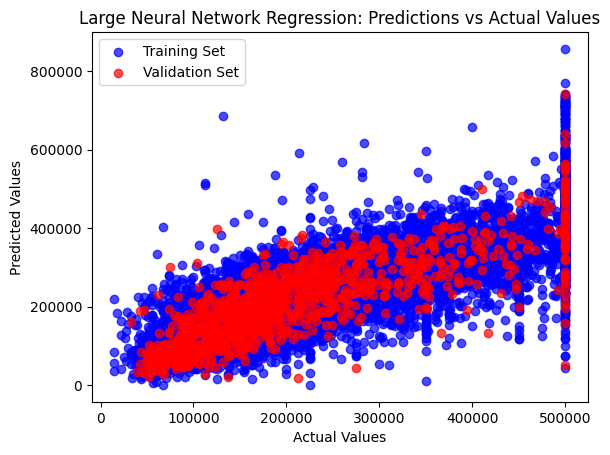

In [35]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the saved model
large_nn = load_model('models/large_nn')

# Visualize the predictions on both the training and validation sets
nn_train_predictions_large = large_nn.predict(x_train)
nn_val_predictions_large = large_nn.predict(x_val)

# Scatter plot for both Training and Validation Sets
plt.scatter(y_train, nn_train_predictions_large, color='blue', label='Training Set', alpha=0.7)
plt.scatter(y_val, nn_val_predictions_large, color='red', label='Validation Set', alpha=0.7)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Large Neural Network Regression: Predictions vs Actual Values')
plt.legend()
plt.show()


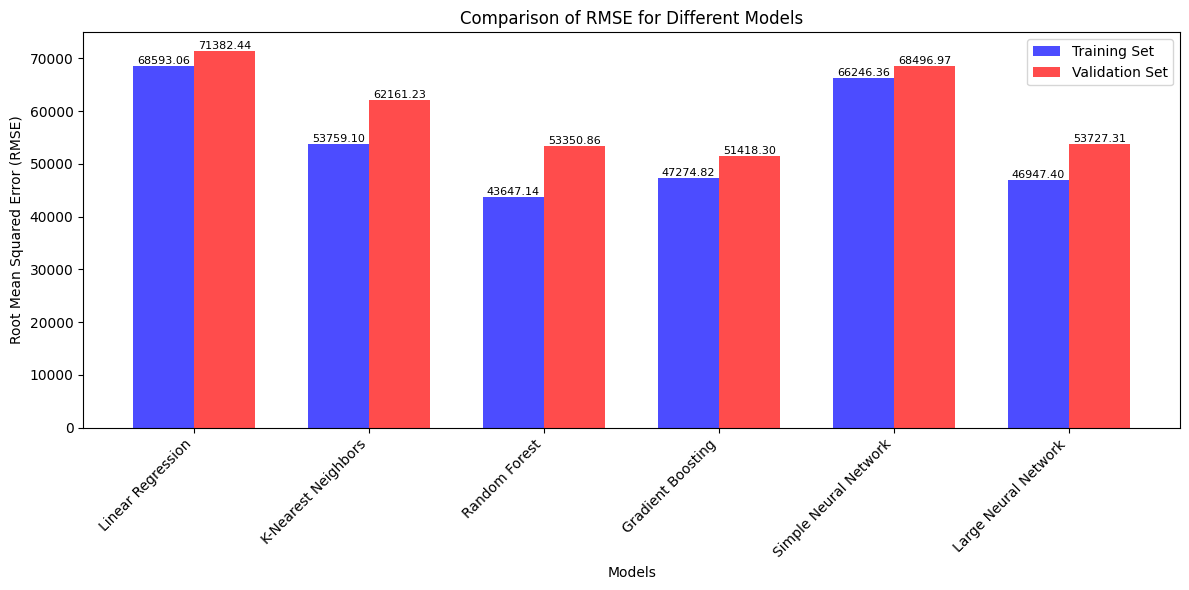

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# RMSE values for each model
rmse_values = [
    (68593.05578127236, 71382.43558330165),  # Linear Regression
    (53759.09908812057, 62161.22860469906),  # K-Nearest Neighbors
    (43647.13752829791, 53350.86411828253),  # Random Forest
    (47274.82259072157, 51418.303574649835),  # Gradient Boosting
    (66246.3590017795, 68496.97190996764),   # Simple Neural Network
    (46947.395569344495, 53727.308980572256)  # Large Neural Network
]

# Extracting RMSE values for training and validation sets
rmse_train = np.array([value[0] for value in rmse_values])
rmse_val = np.array([value[1] for value in rmse_values])

# Labels for each model
models = ['Linear Regression', 'K-Nearest Neighbors', 'Random Forest',
          'Gradient Boosting', 'Simple Neural Network', 'Large Neural Network']

# Width of each bar
bar_width = 0.35

# Creating positions for the bars
bar_positions_train = np.arange(len(models))
bar_positions_val = bar_positions_train + bar_width

# Plotting the grouped bar chart
plt.figure(figsize=(12, 6))
bars_train = plt.bar(bar_positions_train, rmse_train, width=bar_width, color='blue', alpha=0.7, label='Training Set')
bars_val = plt.bar(bar_positions_val, rmse_val, width=bar_width, color='red', alpha=0.7, label='Validation Set')

# Add RMSE values as text labels
for bar, rmse in zip(bars_train, rmse_train):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{rmse:.2f}',
             ha='center', va='bottom', color='black', fontsize=8)

for bar, rmse in zip(bars_val, rmse_val):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{rmse:.2f}',
             ha='center', va='bottom', color='black', fontsize=8)

plt.xlabel('Models')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Comparison of RMSE for Different Models')
plt.xticks(bar_positions_train + bar_width / 2, models, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


In [41]:
mse(rfr.predict(x_test), y_test, squared=False)

52349.6511345385

In [24]:
mse(gbr.predict(x_test), y_test, squared=False)

49343.55811502427

In [25]:
mse(large_nn.predict(x_test), y_test, squared=False)

39/39 [==============================] - 0s 2ms/step


50745.56397875098

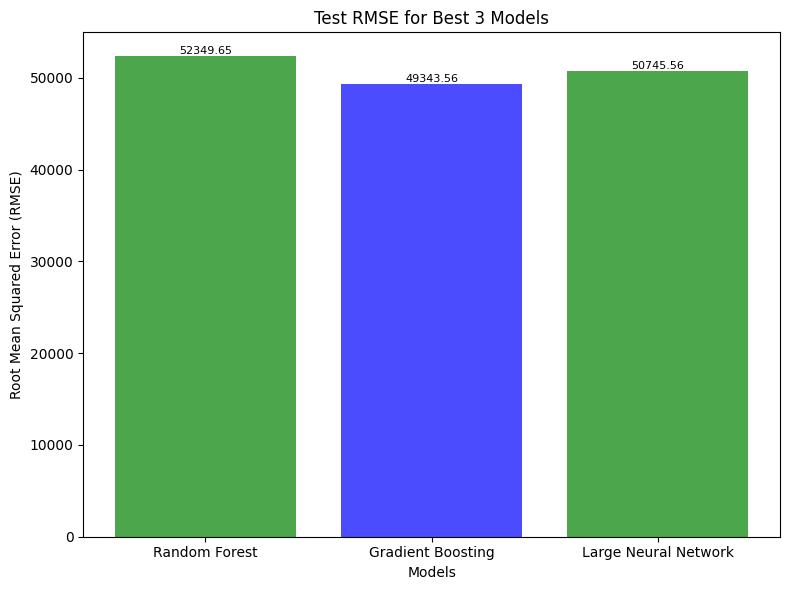

In [45]:
import matplotlib.pyplot as plt

# Test RMSE values for each model
test_rmse_values = [52349.6511345385, 49343.55811502427, 50745.56397875098]

# Labels for each model
models = ['Random Forest', 'Gradient Boosting', 'Large Neural Network']

# Colors for each bar
colors = ['green' if model != 'Gradient Boosting' else 'blue' for model in models]

# Plotting the histogram
plt.figure(figsize=(8, 6))
bars = plt.bar(models, test_rmse_values, color=colors, alpha=0.7)

# Add RMSE values as text labels
for bar, rmse in zip(bars, test_rmse_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{rmse:.2f}',
             ha='center', va='bottom', color='black', fontsize=8)

plt.xlabel('Models')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Test RMSE for Best 3 Models')
plt.tight_layout()
plt.show()


CONCLUSION: Here, I conclude my Machine Learning Project by selecing "Gradient Boosting Regression" as the best model for predicting "Median House Values" as it has the lowest RMSE.